# Space Missions Dataset

This dataset is a synthetic representation of space missions, designed to provide insights into various aspects of space exploration. The synthetic data offers a realistic framework for data analysis and is suitable for machine learning projects.

Source: https://www.kaggle.com/datasets/sameerk2004/space-missions-dataset


Next I import all relevant libraries and load the data set.

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Download latest version
path = kagglehub.dataset_download("sameerk2004/space-missions-dataset")

dataset_path = "/Users/noahknijff/.cache/kagglehub/datasets/sameerk2004/space-missions-dataset/versions/1"
file_name = "space_missions_dataset.csv"
file_path = os.path.join(dataset_path, file_name)

/Users/noahknijff/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 1. Exploratory data analysis & quality of data

In this section I perform EDA on the dataset, looking for any missing values, duplicates, and the overall cleaniness of the data set. (e.g., mission failure reasons, environmental factors), and perhaps historical mission data would enrich the analysis and provide a more robust basis for building predictive models.

In [9]:
df = pd.read_csv(file_path)


display(df.head())


# See column names non-null count and dtype
df.info()

# Count the number of duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")



,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Mission ID                         500 non-null    object 
 1   Mission Name                       500 non-null    object 
 2   Launch Date                        500 non-null    object 
 3   Target Type                        500 non-null    object 
 4   Target Name                        500 non-null    object 
 5   Mission Type                       500 non-null    object 
 6   Distance from Earth (light-years)  500 non-null    float64
 7   Mission Duration (years)           500 non-null    float64
 8   Mission Cost (billion USD)         500 non-null    float64
 9   Scientific Yield (points)          500 non-null    float64
 10  Crew Size                          500 non-null    int64  
 11  Mission Success (%)                500 non-null    float64

So far the data seems clean with, no missing values or duplicates. The data set is not large consisting of 500 rows and 15 columns

Next I check for potential correlations in the numerical data and inspect distributions. I conclude that Mission Success (%) could be an interesting target variable and may hold various interesting relations on other data

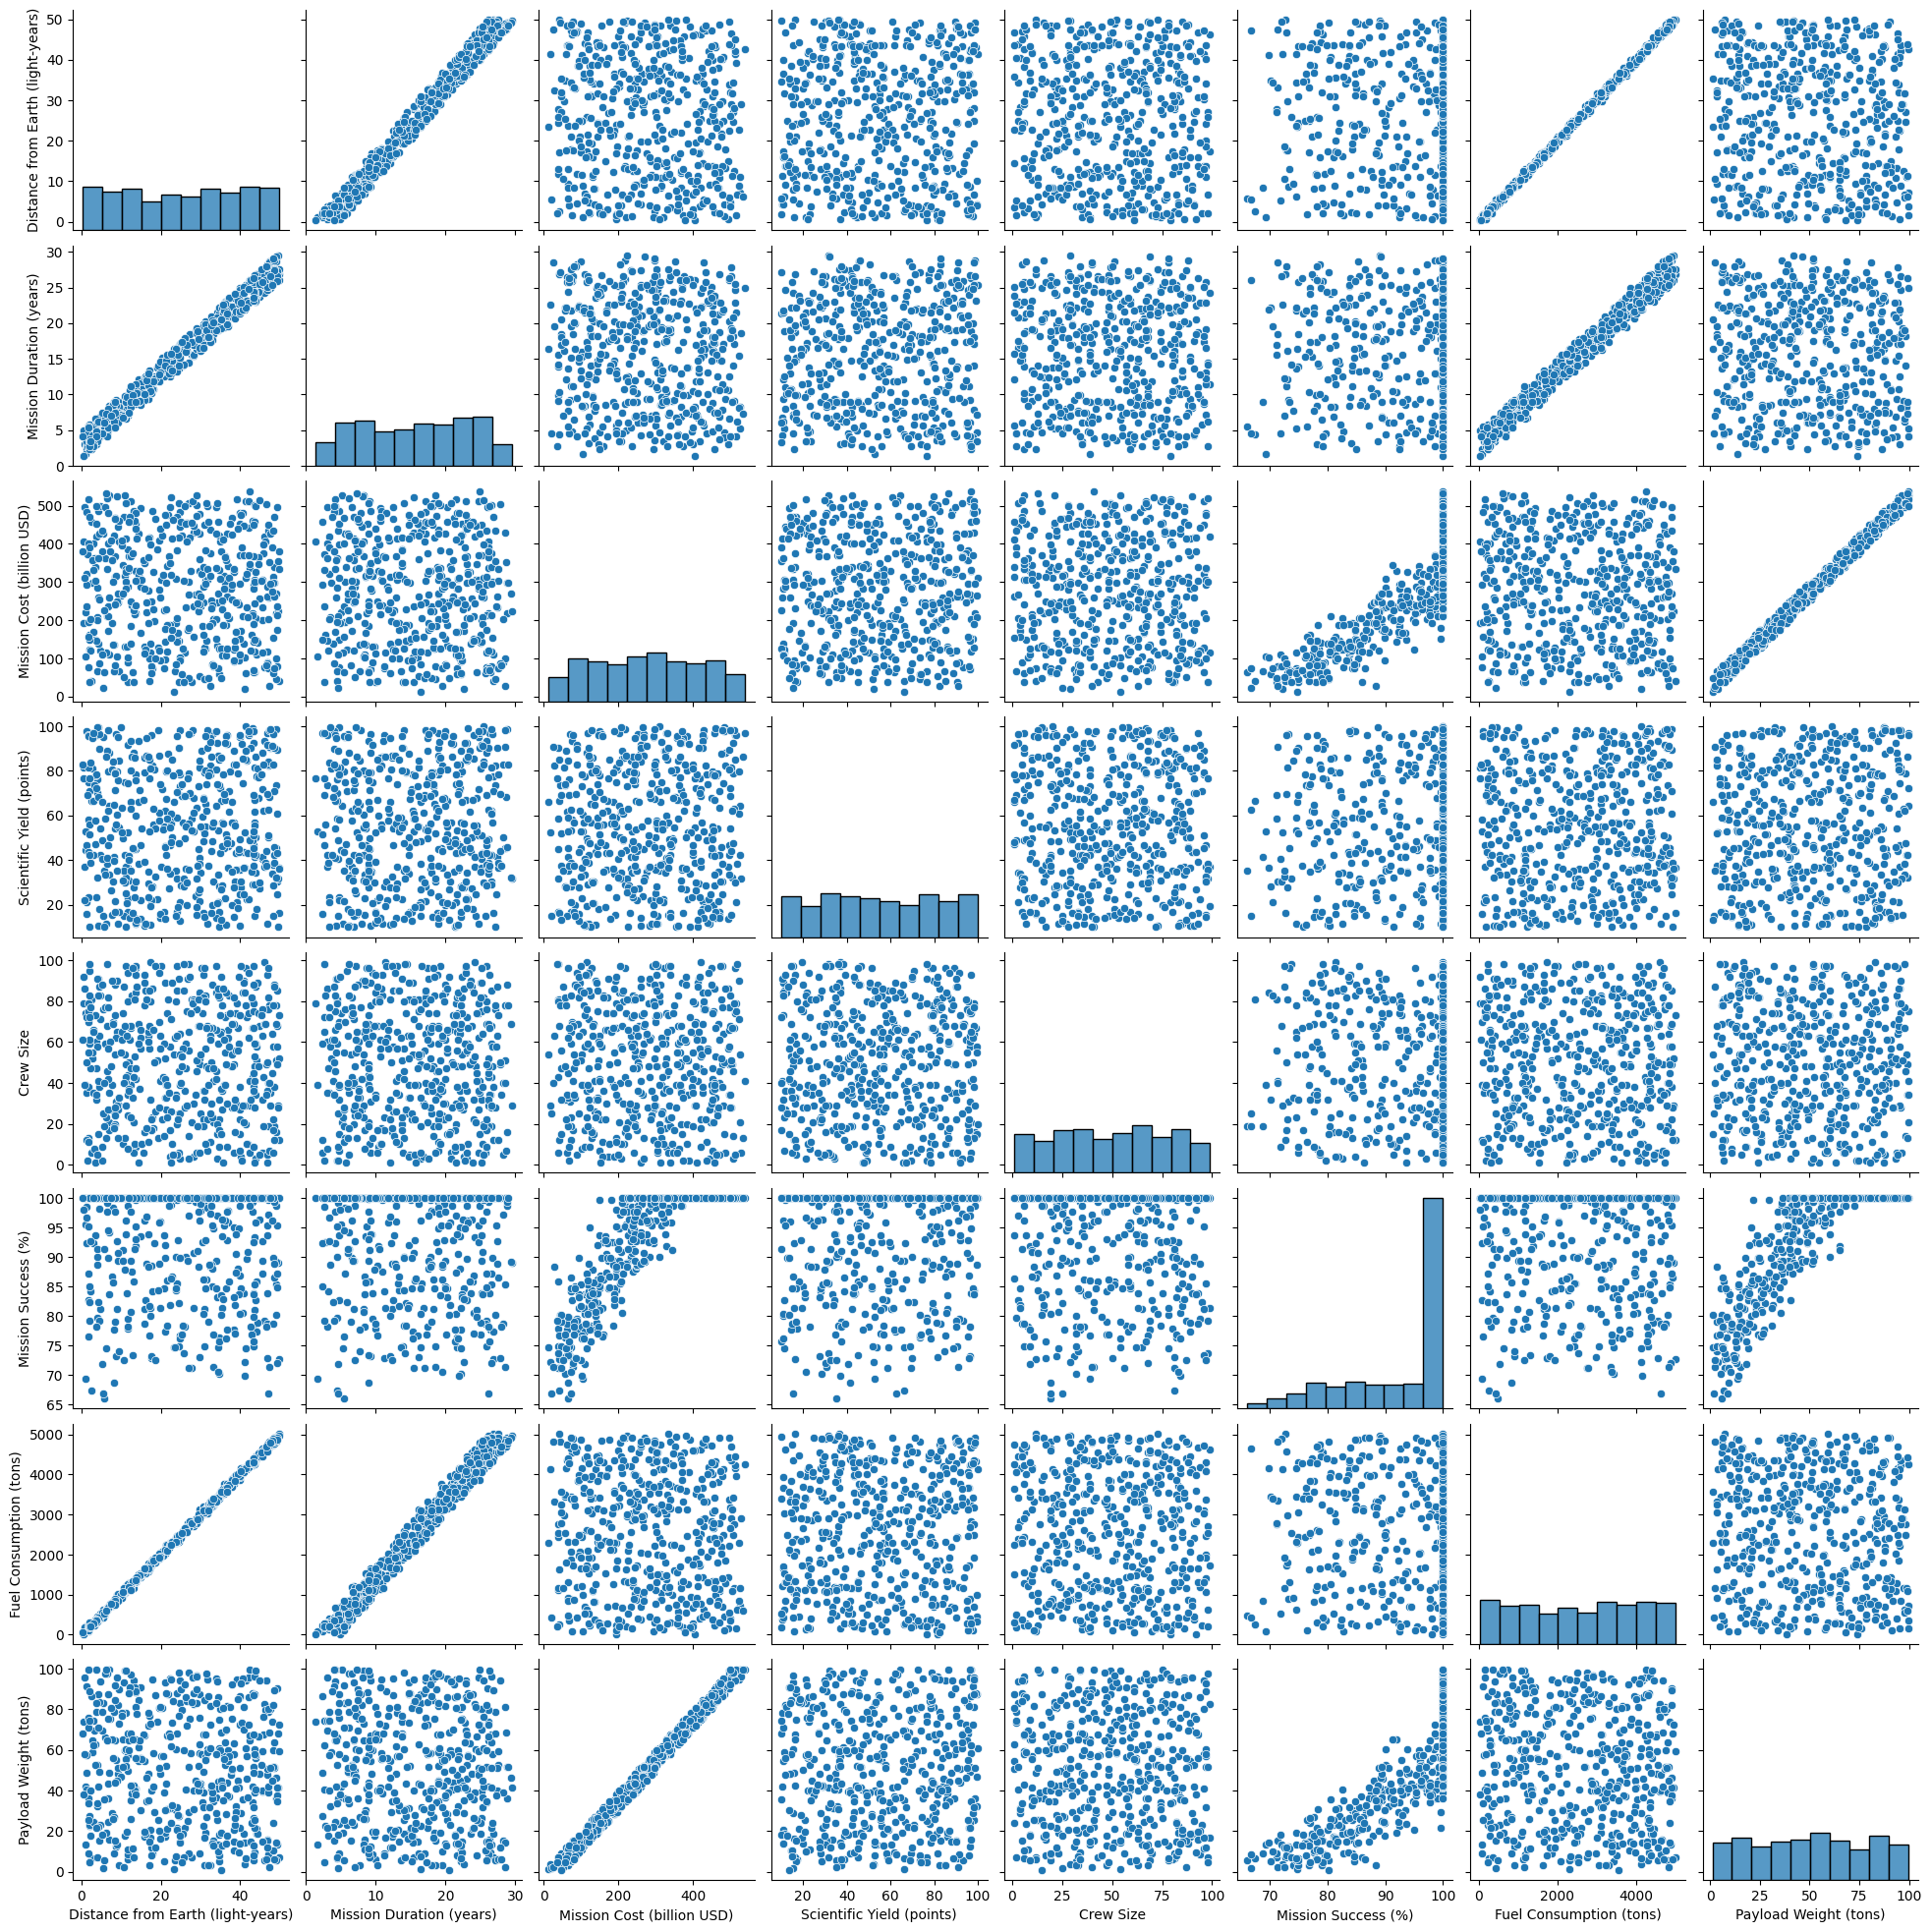

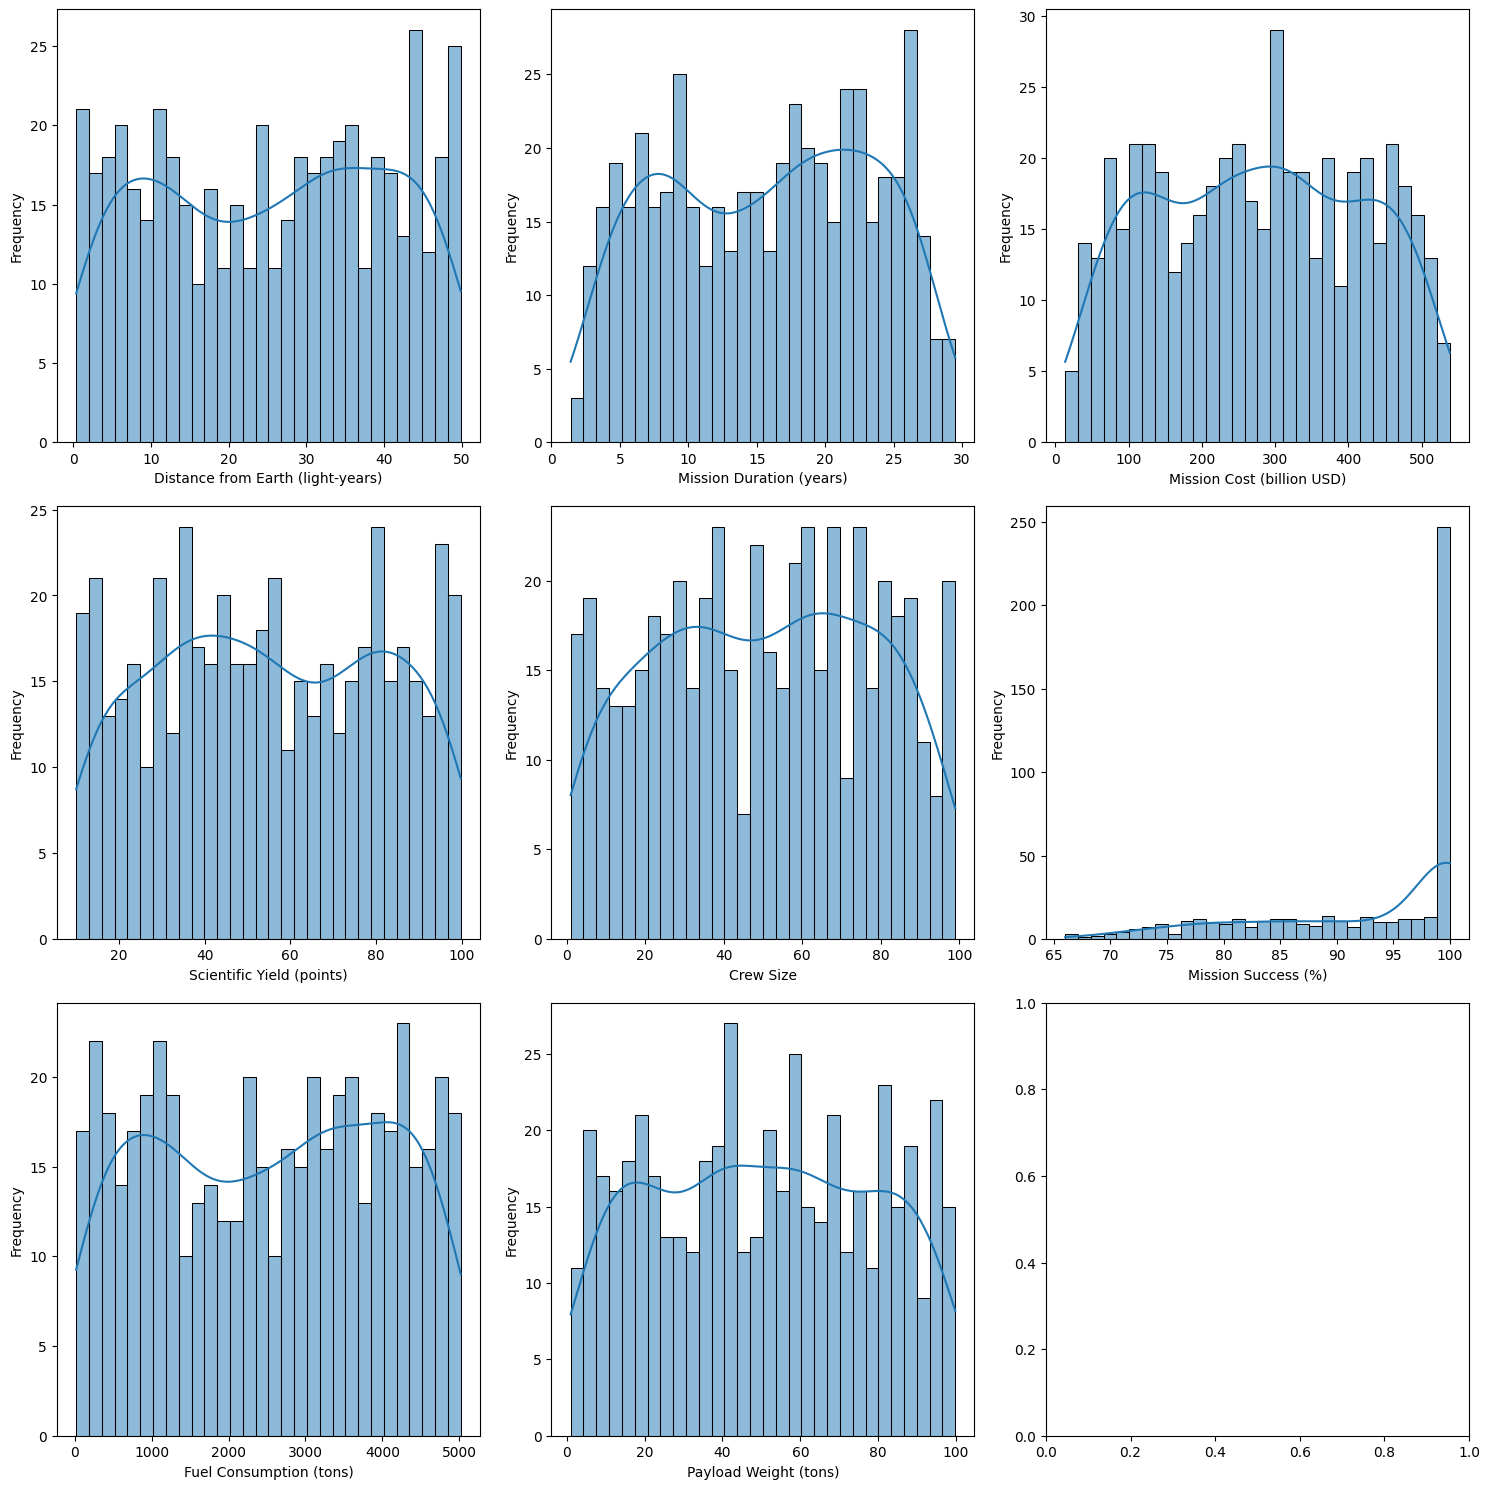

In [11]:
sns.pairplot(df)
plt.savefig('Pairplot_space_exploration.png',dpi=300)
plt.show()


numerical_columns = df.select_dtypes(include=['number'])

# Create a figure with subplots, set the number of rows and columns based on the number of numerical columns
num_columns = len(numerical_columns.columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Adjust rows depending on the number of columns
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Create subplots
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot distributions for each numerical column
for i, column in enumerate(numerical_columns.columns):
    sns.histplot(numerical_columns[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Save the figure
plt.savefig('Distributions_space_exploration.png', dpi=300)

# Display the plot
plt.show()

Now, the non-numerical columns can be inspected. If their (categorical) unique values are not too high, then we can use one-hot encoding to separate the unique categories and link a numerical value to them.

In [5]:
print(df['Mission Type'].unique().tolist())
print(df['Mission Type'].value_counts(), "\n")

print(df['Target Type'].unique().tolist())
print(df['Target Type'].value_counts(), "\n")

print(df['Target Name'].unique().tolist())
print(df['Target Name'].value_counts(), "\n")

print(df['Launch Vehicle'].unique().tolist())
print(df['Launch Vehicle'].value_counts())

['Colonization', 'Exploration', 'Mining', 'Research']
Mission Type
Research        132
Exploration     127
Colonization    125
Mining          116
Name: count, dtype: int64 

['Star', 'Exoplanet', 'Asteroid', 'Moon', 'Planet']
Target Type
Star         112
Planet       109
Moon          95
Exoplanet     93
Asteroid      91
Name: count, dtype: int64 

['Titan', 'Betelgeuse', 'Mars', 'Proxima b', 'Ceres', 'Io', 'Europa']
Target Name
Proxima b     81
Mars          73
Io            72
Titan         70
Europa        70
Betelgeuse    67
Ceres         67
Name: count, dtype: int64 

['SLS', 'Starship', 'Ariane 6', 'Falcon Heavy']
Launch Vehicle
Starship        140
Ariane 6        124
Falcon Heavy    121
SLS             115
Name: count, dtype: int64


## 2. Data transformation & feature scaling

In this section data is transformed, and selected. The first two columns are not (Mission ID, Mission Type) relevant for machine learning, and the third column ('Launch Date') can be omitted after creating 'Launch Year', since mission success is probably related to 'Launch Year', in terms of development, as opposed to what month/day it was launched on. Therefore, a smaller subset is made excluding these 3 columns. Then the features are scaled, and the non-numerical categories are one-hot encoded.

In [6]:
# Convert date to a numerical format and extract launch year
df["Launch Year"]= pd.to_datetime(df['Launch Date']).dt.year

# Make a subset with relevant selected columns 
df_select = df.iloc[:, 3:]

# Do one hot encoded for categorical variables
df_select = pd.get_dummies(df_select, drop_first=True)


# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_select)
df_final = pd.DataFrame(df_scaled, columns=df_select.columns)

display(df_final.head())

,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Year,Target Type_Exoplanet,...,Target Name_Io,Target Name_Mars,Target Name_Proxima b,Target Name_Titan,Mission Type_Exploration,Mission Type_Mining,Mission Type_Research,Launch Vehicle_Falcon Heavy,Launch Vehicle_SLS,Launch Vehicle_Starship
0,-1.234866,-1.391781,1.768698,0.343553,-1.053728,0.787000,-1.214668,1.752681,-1.548937,-0.478018,...,-0.410152,-0.413473,-0.439679,2.478479,-0.583509,-0.549621,-0.598912,-0.565032,1.829707,-0.623610
1,1.090423,0.959379,-0.306535,1.104347,0.791870,-0.321541,1.108897,-0.164388,-1.548937,2.091971,...,-0.410152,-0.413473,-0.439679,-0.403473,-0.583509,-0.549621,-0.598912,-0.565032,-0.546536,1.603567
2,1.590183,1.725487,-0.415758,1.641823,-1.234669,0.637774,1.585333,-0.504822,-1.548937,-0.478018,...,-0.410152,2.418536,-0.439679,-0.403473,1.713770,-0.549621,-0.598912,-0.565032,-0.546536,1.603567
3,0.056738,0.272523,-0.314975,-0.727614,0.321424,-0.278905,0.017116,-0.343470,-1.548937,2.091971,...,-0.410152,-0.413473,-0.439679,2.478479,-0.583509,-0.549621,-0.598912,-0.565032,-0.546536,1.603567
4,-1.126339,-0.863430,-1.455077,1.562337,-0.691846,-2.069625,-1.106802,-1.345977,-1.548937,2.091971,...,-0.410152,-0.413473,2.274388,-0.403473,-0.583509,1.819435,-0.598912,-0.565032,-0.546536,1.603567


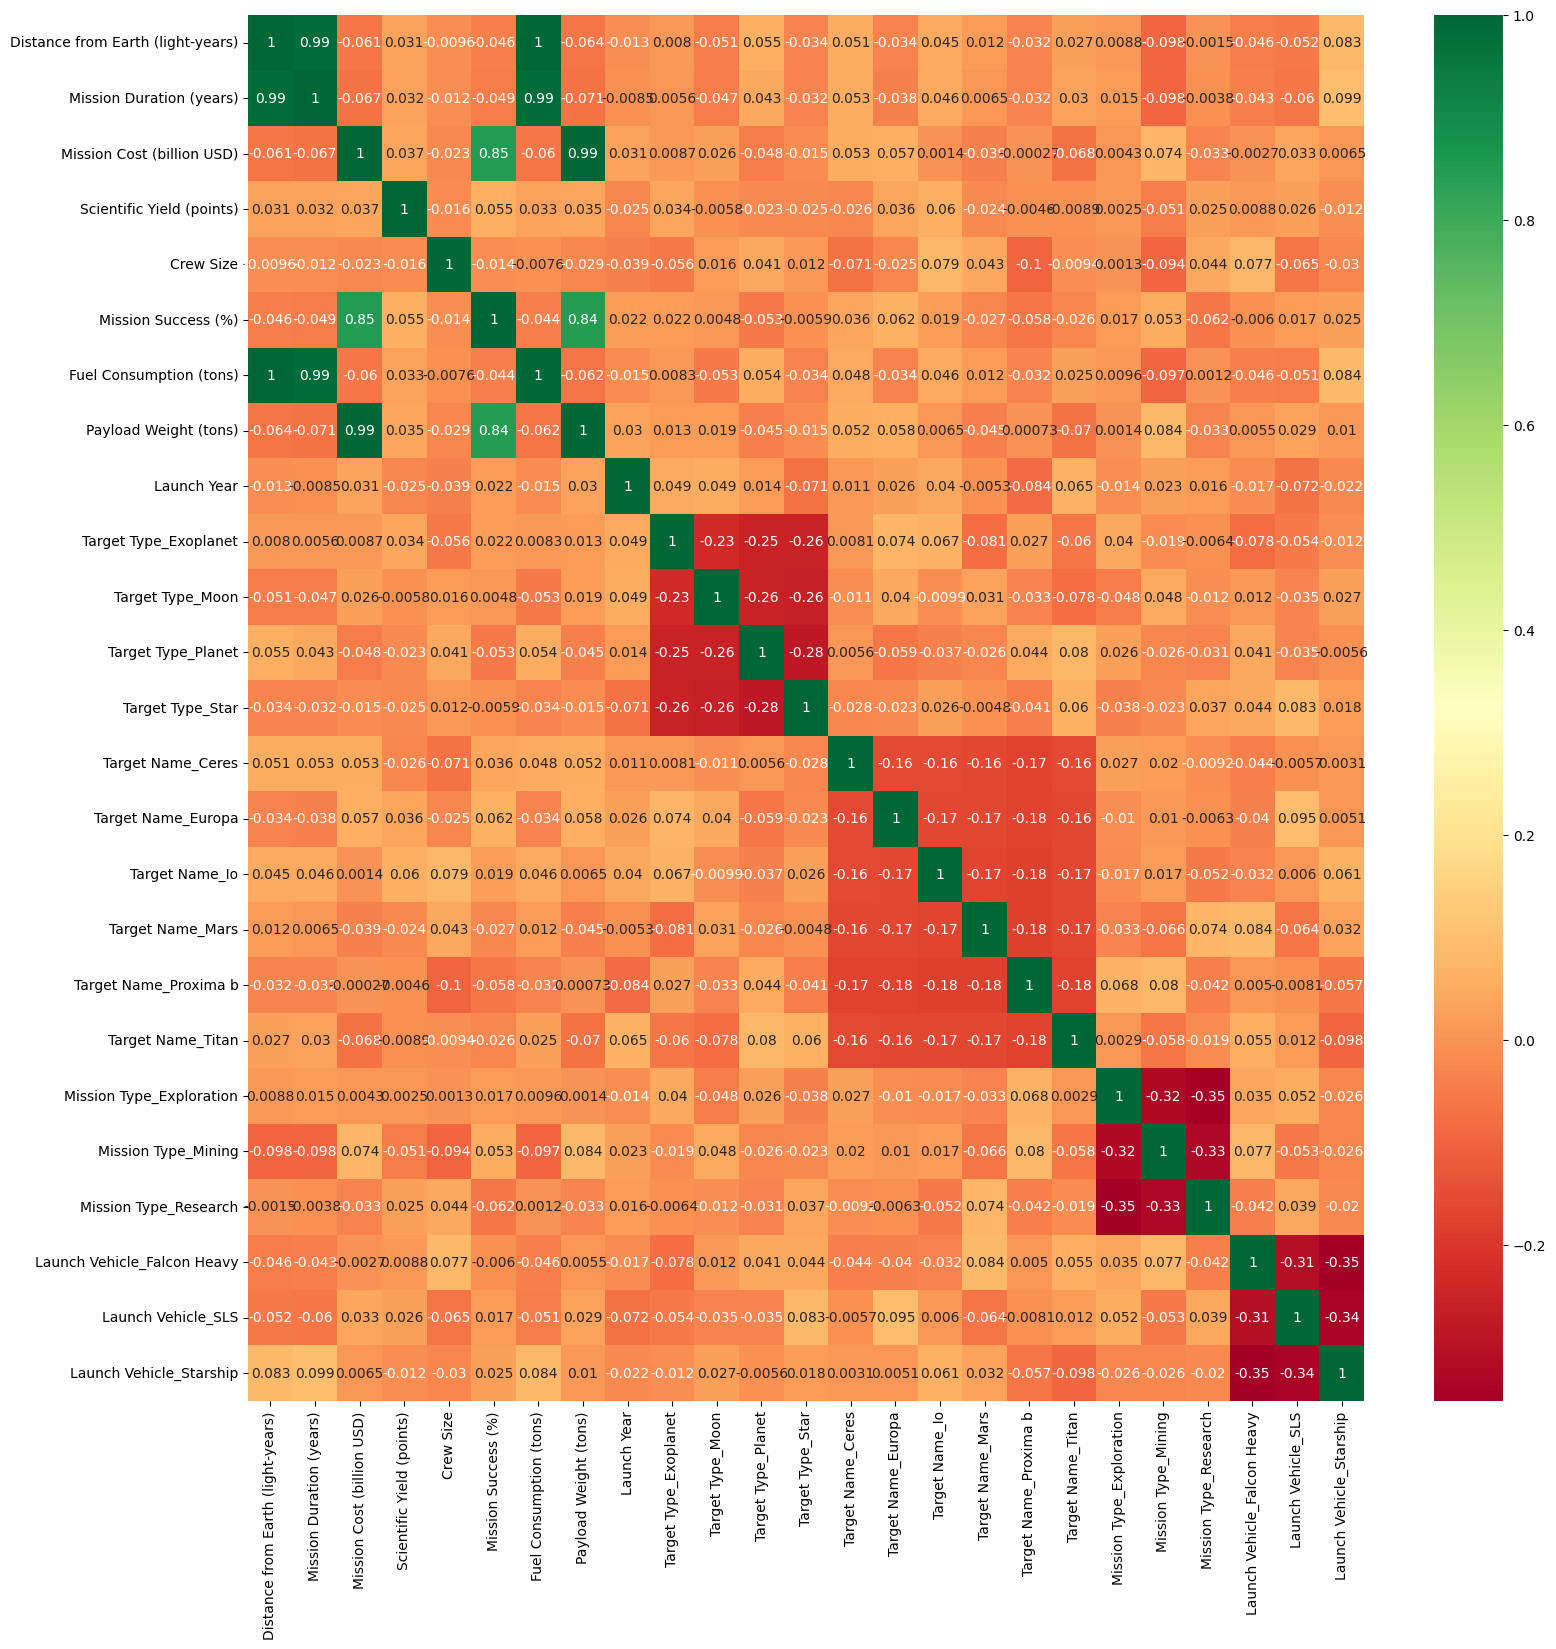

Mission Type_Research               -0.061561
Target Name_Proxima b               -0.057827
Target Type_Planet                  -0.053289
Mission Duration (years)            -0.048928
Distance from Earth (light-years)   -0.045771
Fuel Consumption (tons)             -0.043538
Target Name_Mars                    -0.026632
Target Name_Titan                   -0.025903
Crew Size                           -0.013866
Launch Vehicle_Falcon Heavy         -0.005977
Target Type_Star                    -0.005859
Target Type_Moon                     0.004795
Launch Vehicle_SLS                   0.016510
Mission Type_Exploration             0.016990
Target Name_Io                       0.019494
Launch Year                          0.021548
Target Type_Exoplanet                0.021891
Launch Vehicle_Starship              0.024535
Target Name_Ceres                    0.035976
Mission Type_Mining                  0.052511
Scientific Yield (points)            0.054555
Target Name_Europa                

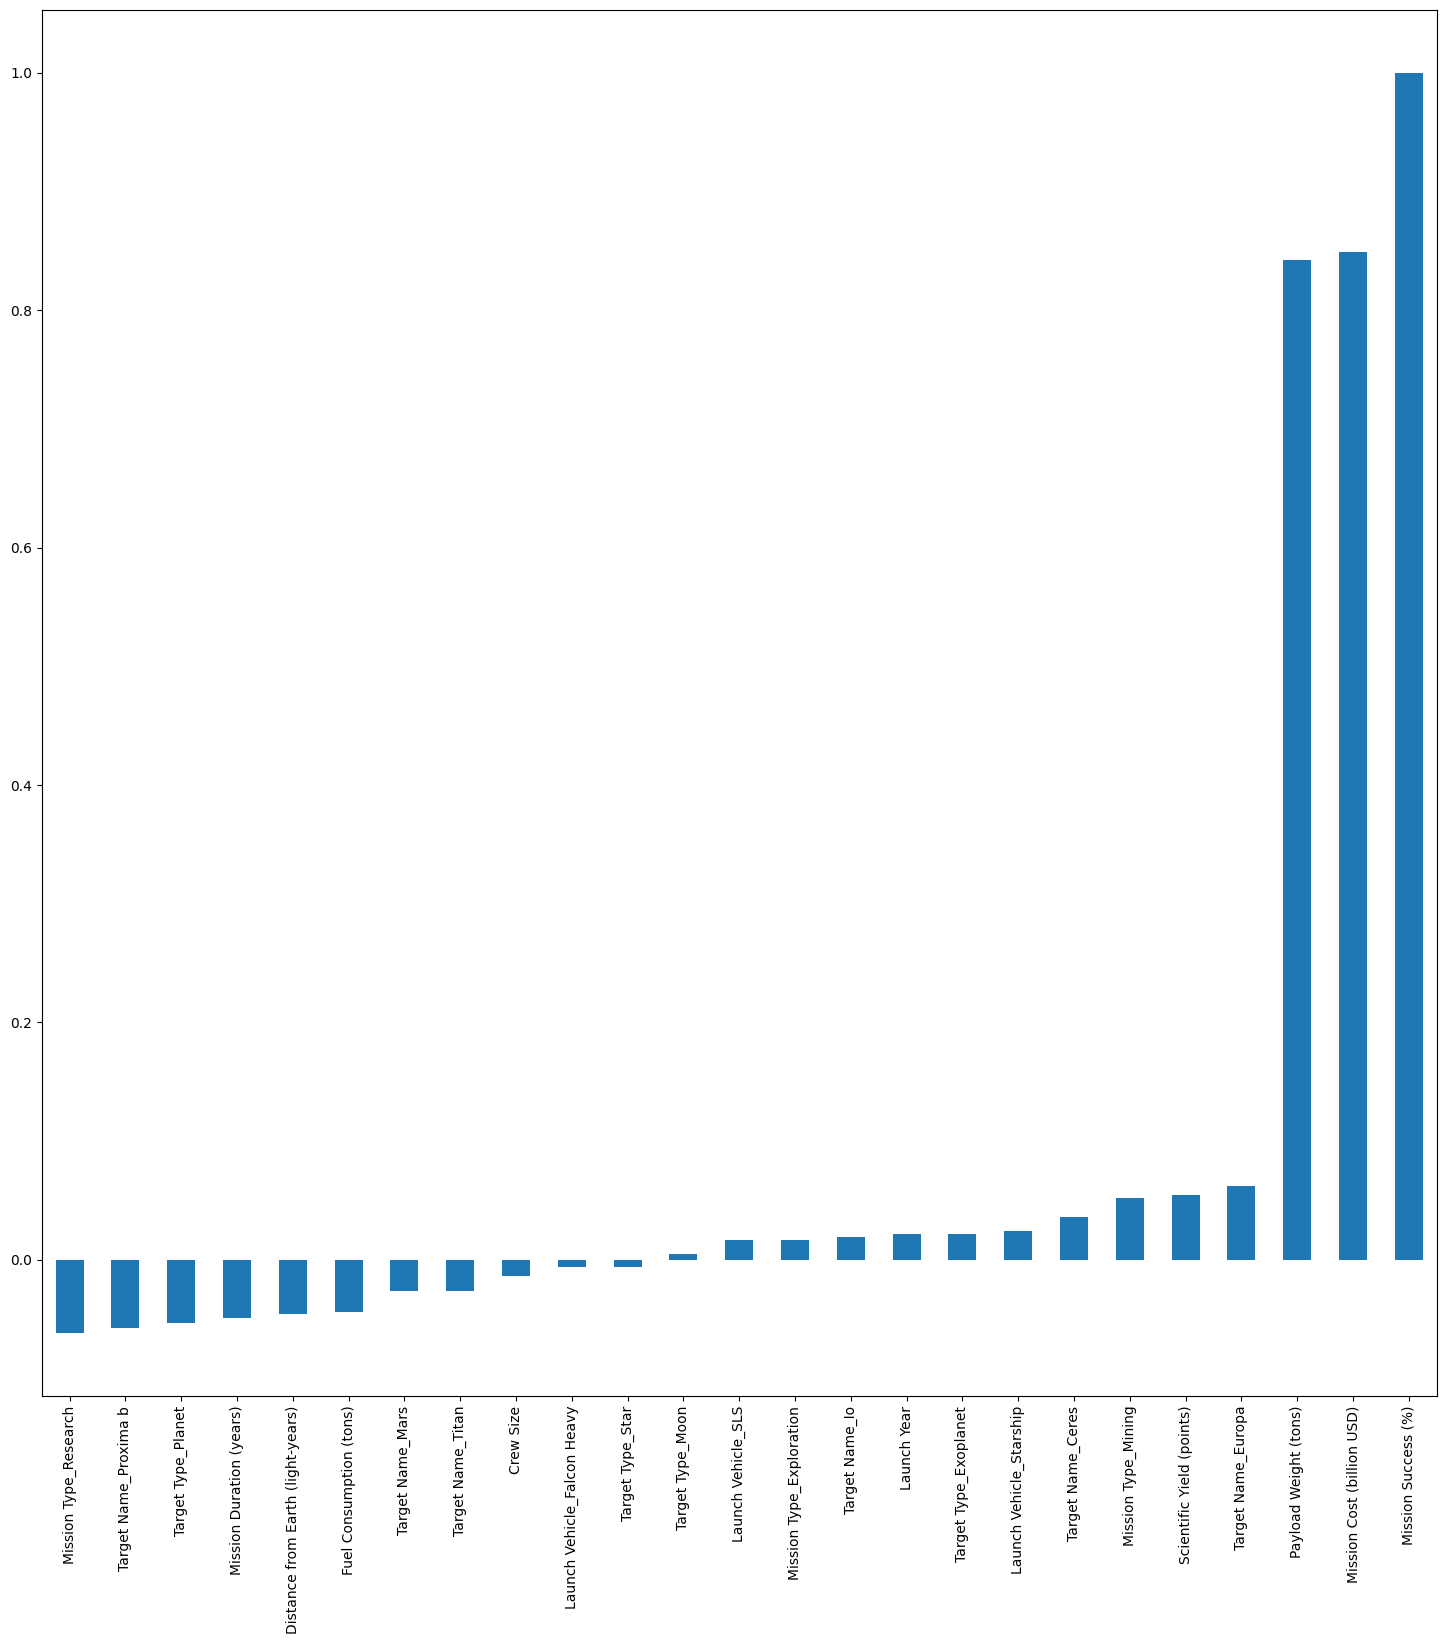

In [14]:
plt.figure(figsize=(18,18))
sns.heatmap(df_select.corr(),annot=True,cmap='RdYlGn')
plt.savefig('correlation_heatmap.png', dpi=350)
plt.show()



features = df_select.corr()['Mission Success (%)'].sort_values()
print(features)
features.plot(kind='bar',figsize=(18,18))
plt.savefig('barplot.png', dpi=300)


## 3. Formulate Hypotheses

From the EDA and the Pearson correlation coefficients as seen above, I formulate the following 3 hypotheses.


### Hypothesis 1:
Payload Weight is Positively Correlated with Mission Success (%).

It might be worth investigating if heavier payloads (representing more advanced equipment or something similar) contribute to mission success. To test the relationship between the two quantities we could perform a regression analysis.

<em>$H_{0}$: There is no statistically significant relationship between Payload Weight and Mission Success.</em>

<em>$H_{1}$: There is a statistically significant relationship between Payload Weight and Mission Success.</em>


### Hypothesis 2:
Mission Cost (billion USD) is positively correlated with Mission Success (%).
Higher costs could indicate more resources allocated, which might improve the mission's chances of success.

<em>$H_{0}$: There is no statistically significant relationship between Mission Cost and Mission Success.</em>

<em>$H_{1}$: There is a statistically significant relationship between Mission Cost and Mission Success.</em>


### Hypothesis 3:
Fuel Consumption (tons) is positively correlated with Mission Duration (years).
Longer missions likely consume more fuel due to extended operation times and distances traveled.

<em>$H_{0}$: There is no statistically significant relationship between Fuel Consumption and Mission Duration.
</em>

<em>$H_{1}$: There is a statistically significant relationship between Fuel Consumption and Mission Duration.
</em>



 ## 4. Significance test
 


In [8]:
df = df_select

# Hypothesis 1: Payload Weight and Mission Success
X1 = df['Payload Weight (tons)']
y1 = df['Mission Success (%)']
X1 = sm.add_constant(X1)  # Add intercept
model1 = sm.OLS(y1, X1).fit()
print("Hypothesis 1 Results:")
print(model1.summary())

# Hypothesis 2: Mission Cost and Mission Success
X2 = df['Mission Cost (billion USD)']
y2 = df['Mission Success (%)']
X2 = sm.add_constant(X2)  # Add intercept
model2 = sm.OLS(y2, X2).fit()
print("Hypothesis 2 Results:")
print(model2.summary())

# Hypothesis 3: Fuel Consumption and Mission Duration
X3 = df['Fuel Consumption (tons)']
y3 = df['Mission Duration (years)']
X3 = sm.add_constant(X3)  # Add intercept
model3 = sm.OLS(y3, X3).fit()
print("Hypothesis 3 Results:")
print(model3.summary())

Hypothesis 1 Results:
                             OLS Regression Results                            
Dep. Variable:     Mission Success (%)   R-squared:                       0.710
Model:                             OLS   Adj. R-squared:                  0.709
Method:                  Least Squares   F-statistic:                     1220.
Date:                 Mon, 13 Jan 2025   Prob (F-statistic):          5.53e-136
Time:                         11:13:19   Log-Likelihood:                -1519.3
No. Observations:                  500   AIC:                             3043.
Df Residuals:                      498   BIC:                             3051.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

The relevant above results are summarized in the following table

| Hypothesis                                | P-value (Coefficient) | Prob (F-statistic)       | F-statistic |
|-------------------------------------------|------------------------|-------------------------|-------------|
| Payload Weight and Mission Success (%)    | 0.000                  | 5.53 × $10^{-136}$      | 1220        |
| Mission Cost and Mission Success (%)      | 0.000                  | 3.40 × $10^{-140}$      | 1288        |
| Fuel Consumption and Mission Duration     | 0.000                  | 0.000 (exact 0)         | 19820       |


All the p-values are effectively zero or close to it, which means they are well below the common significance threshold ($\alpha \leq 0.05$). This confirms that the relationships in all three hypotheses are statistically significant.


For all three hypotheses, the evidence strongly supports $H_{1}$ (there is a significant correlation between the variables). The large F-statistics (with corresponding low probability) across all models reaffirm the reliability of this conclusion.

### 5. Next steps for analyzing this data

Here I'll list 3 suggestions of further analysis.

1. Explore non-linear relationships between predictors and the outcome variable. Especially the first two relationships 'Payload Weight and Mission Success (%)' and 'Mission Cost and Mission Success (%)', may not be (fully) linear.

2. Modeling with Multiple Variables. To do this I should conduct Multiple Linear Regression to predict Mission Success (%) using more than one independent variable (e.g., Payload Weight, Mission Cost, Crew Size, etc.).

3. Feature Engineering. I could create new features that might improve model performance. For example, combining variables like Fuel Consumption and Payload Weight into a new (combined) metric could reveal a more meaningful relationship.

